In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [26]:
data_train_path = 'Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/Fruits_Vegetables/validation'


In [27]:
img_width = 180
img_height = 180

In [28]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split=False
)


Found 3115 files belonging to 36 classes.


In [29]:
data_cat = data_train.class_names

In [30]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size = (img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [31]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                        image_size = (img_height,img_width),
                                                        shuffle=False,
                                                        batch_size=32,
                                                        validation_split=False)

Found 359 files belonging to 36 classes.


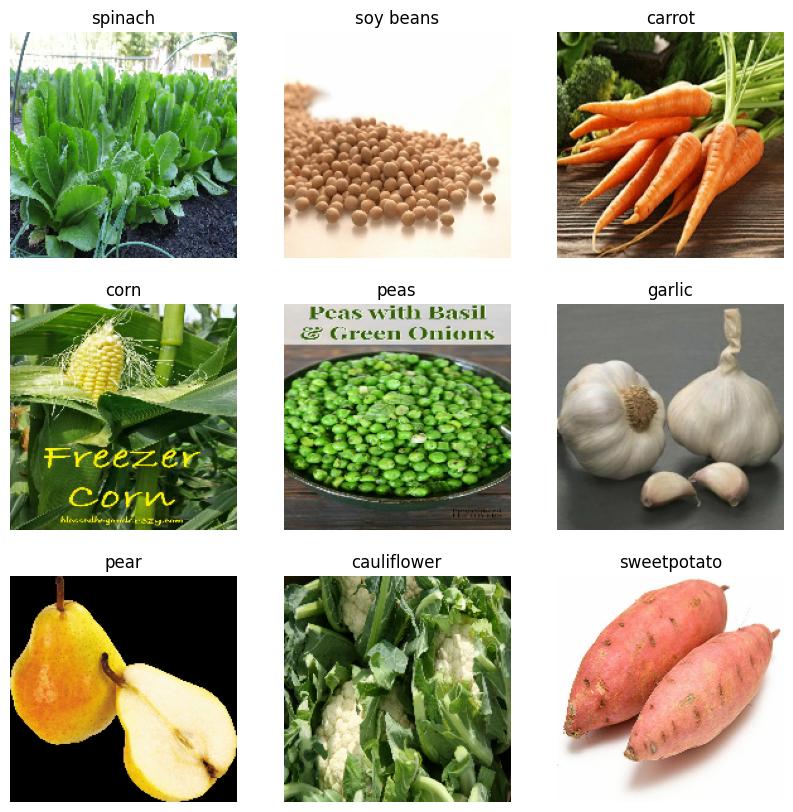

In [32]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [33]:
from tensorflow.keras.models import Sequential

In [35]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [37]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units = len(data_cat))
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
